## **COGNORISE INFOTECH_project_Task_5**

**VISHNU R NAIR**

# **SENTIMENT ANALYSIS ON MOVIE REVIEWS**

AIM :  Perform sentiment analysis on movie reviews to determine if the sentiment is positive or negative.

**IMPORTING NECESSARY MODULES AND PACKAGES**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import TweetTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

**IMPORTING DATASET**

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
#To get consis summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.sample(frac=1).head()   

,review,sentiment
48738,I rented this movie when it came out on video ...,positive
21542,I knew it wasn't gunna work out between me and...,negative
32992,This show sucks. it was put on fridays on roll...,negative
10350,This little cheapy is notable only because it ...,negative
7850,"DD films were damn corny, damn stupid and had ...",negative


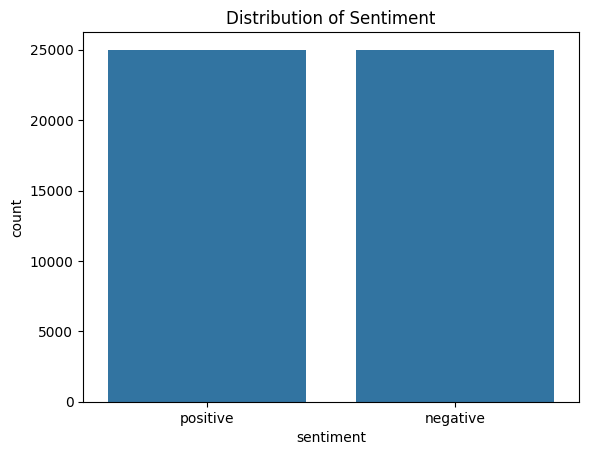

In [5]:
#Distribution of Sentiment
plt.title("Distribution of Sentiment")
sns.countplot(x='sentiment',data=df)
plt.show()

**Transforming string to lowercase and removing special characters**

In [6]:
df['review']=df['review'].apply(lambda x:x.lower()).apply(lambda x:re.sub(r'[^a-zA-Z0-9 ]','',x))
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


**Removing stopwords**

In [7]:
nltk.download('stopwords')
sw=stopwords.words('english')
tk=TweetTokenizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VISHNU_STUDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['review']=df['review'].apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


**Stemming**

In [9]:
stemmer=SnowballStemmer('english')
df['review']=df['review'].apply(lambda x:[stemmer.stem(i) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


**Removing word with length less than 3**

In [10]:
df['review']=df['review'].apply(lambda x:[i for i in tk.tokenize(x) if len(i)>2]).apply(lambda x:' '.join(x))
df.head()

,review,sentiment
0,one review mention watch episod youll hook rig...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


**VECTORIZATION**

In [11]:
vec=TfidfVectorizer(max_features=20000)
data=vec.fit_transform(df['review']).toarray()
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
data.shape

(50000, 20000)

In [13]:
df['sentiment']=df['sentiment'].map({'negative':0,'positive':1})

In [14]:
df.head()

,review,sentiment
0,one review mention watch episod youll hook rig...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [15]:
X=data
y=df['sentiment']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

MODEL CREATION AND PERFORMANCE EVALUATION

In [17]:
knn=KNeighborsClassifier(n_neighbors=3)
nb=BernoulliNB()
dt=DecisionTreeClassifier(random_state=42,criterion='gini')
rf=RandomForestClassifier(criterion='gini',random_state=42,n_estimators=50)
xg=XGBClassifier()
lg=LogisticRegression(random_state=42)

In [18]:
models=[knn,nb,dt,rf,xg,lg]
accuracy=[]
for model in models:
  print(f'******************{model}******************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc_score=accuracy_score(y_test,y_pred)
  accuracy.append(acc_score*100)
  print(classification_report(y_test,y_pred))
  print('*'*200)

******************KNeighborsClassifier(n_neighbors=3)******************
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      7411
           1       0.74      0.83      0.78      7589

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000

********************************************************************************************************************************************************************************************************
******************BernoulliNB()******************
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7411
           1       0.87      0.83      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

***********************

In [19]:
m=['KNeighborsClassifier','Naive Bayes Classifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','LogisticRegression']
acc_df=pd.DataFrame({'Model':m,'Accuracy':accuracy})

In [20]:
acc_df

,Model,Accuracy
0,KNeighborsClassifier,76.706667
1,Naive Bayes Classifier,85.186667
2,DecisionTreeClassifier,72.180000
3,RandomForestClassifier,83.480000
4,XGBClassifier,85.573333
5,LogisticRegression,89.220000


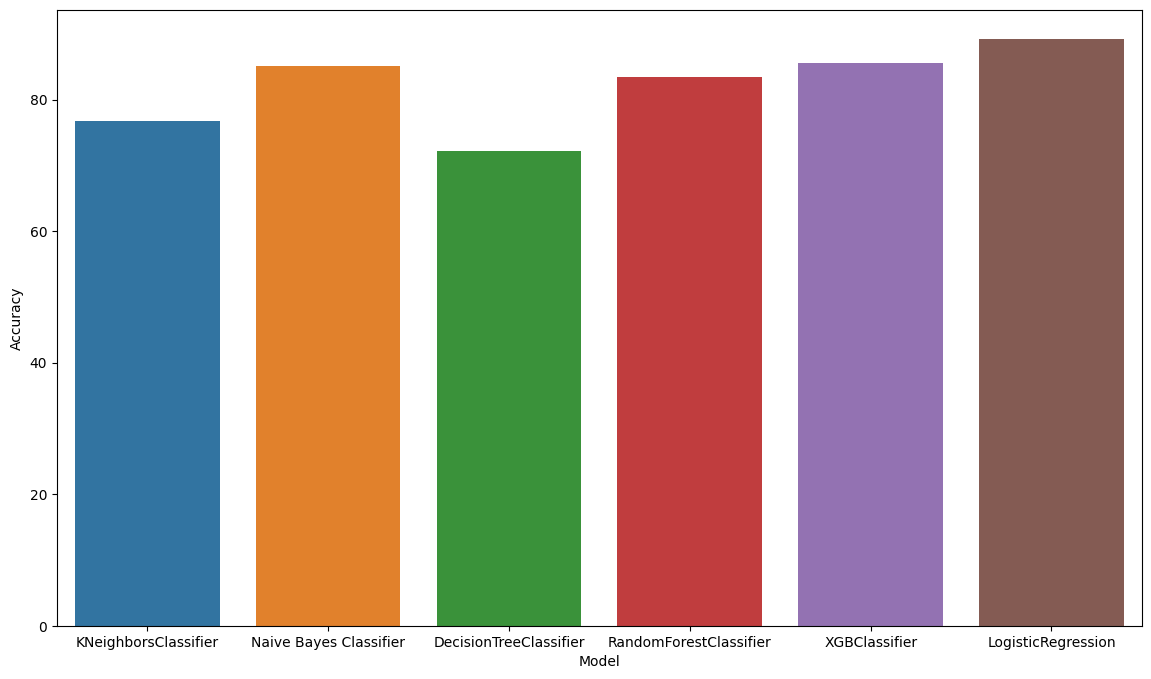

In [21]:
plt.figure(figsize=(14,8))
sns.barplot(x='Model',y='Accuracy',data=acc_df,hue='Model')
plt.show()

**Predicting New Review sentiment**

In [38]:
new_review="Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.I imagine this film would appeal to a stoner who is currently partaking."
y_new=lg.predict(vec.transform([new_review]))
if y_new.item() == 0:
    print("Negative")
else:
    print("Positive")    

Negative
